In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib
from sklearn.manifold import TSNE
from visualizations import *

## Load Data

In [13]:
# read data
data_path = "./dataset/CC_GENERAL_log2.csv"

df = pd.read_csv(data_path)

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.711393,0.818182,4.558183,-4.605170,4.558183,-4.605170,0.166667,0.000000,0.083333,0.000000,-4.605170,0.698135,6.907765,5.307337,4.938206,0.000000,12
1,8.071680,0.909091,-4.605170,-4.605170,-4.605170,8.770743,0.000000,0.000000,0.000000,0.250000,1.388791,-4.605170,8.853667,8.319484,6.977608,0.222222,12
2,7.822108,1.000000,6.650512,6.650512,-4.605170,-4.605170,1.000000,1.000000,0.000000,0.000000,-4.605170,2.485740,8.922660,6.433063,6.441417,0.000000,12
3,7.418589,0.636364,7.312560,7.312560,-4.605170,5.326895,0.083333,0.083333,0.000000,0.083333,0.009950,0.009950,8.922660,-4.605170,-4.605170,0.000000,12
4,6.706525,1.000000,2.773214,2.773214,-4.605170,-4.605170,0.083333,0.083333,0.000000,0.000000,-4.605170,0.009950,7.090085,6.519656,5.500447,0.000000,12


## Load Scalers

In [14]:
dir_path = "./transformers"

# Load each scaler
z_scaler = joblib.load(f"{dir_path}/z_scaler.pkl")
maxabs_scaler = joblib.load(f"{dir_path}/maxabs_scaler.pkl")
minmax_scaler = joblib.load(f"{dir_path}/minmax_scaler.pkl")
robust_scaler = joblib.load(f"{dir_path}/robust_scaler.pkl")

In [15]:
# scale data
df_z_scaled = z_scaler.fit_transform(df)
df_maxabs_scaled = maxabs_scaler.fit_transform(df)
df_minmax_scaled = minmax_scaler.fit_transform(df)
df_robust_scaled = robust_scaler.fit_transform(df)

In [16]:
# print("Original data:\n", df_log1.head())
print("Z Scaled data:\n", df_z_scaled[:2])
print()
print("Maxabs Scaled data:\n", df_maxabs_scaled[:2])
print()
print("MinMax Scaled data:\n", df_minmax_scaled[:2])
print()
print("Robust Scaled data:\n", df_robust_scaled[:2])

Z Scaled data:
 [[-1.0649815  -0.24988139  0.15056818 -1.01997081  0.60680149 -0.95292396
  -0.80664908 -0.67871619 -0.70740935 -0.67529446 -0.9413752  -0.0055724
  -1.44716805 -0.54736245 -0.33374929 -0.52558844  0.36054128]
 [ 0.88301211  0.1340494  -1.77829718 -1.01997081 -1.11835006  1.34743216
  -1.22192823 -0.67871619 -0.91708951  0.57394905  1.00524107 -1.72726791
   0.92594658  0.83657258  0.64858859  0.2341587   0.36054128]]

Maxabs Scaled data:
 [[ 0.37662052  0.818182    0.42203905 -0.43381618  0.45485082 -0.42795725
   0.166667    0.          0.083333    0.         -0.95696508  0.11871907
   0.67007438  0.48987313  0.43919297  0.          1.        ]
 [ 0.8190888   0.909091   -0.42638953 -0.43381618 -0.45953953  0.8150628
   0.          0.          0.          0.16666667  0.28859405 -0.7831175
   0.85883279  0.76789768  0.62057276  0.222222    1.        ]]

MinMax Scaled data:
 [[0.57515728 0.818182   0.59480847 0.         0.62649235 0.
  0.166667   0.         0.083333   0.

In [17]:
m_features = df.shape[1]

# Visualization

## PCA

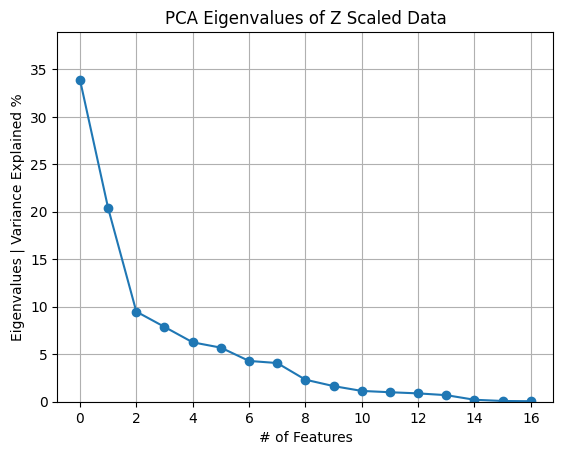

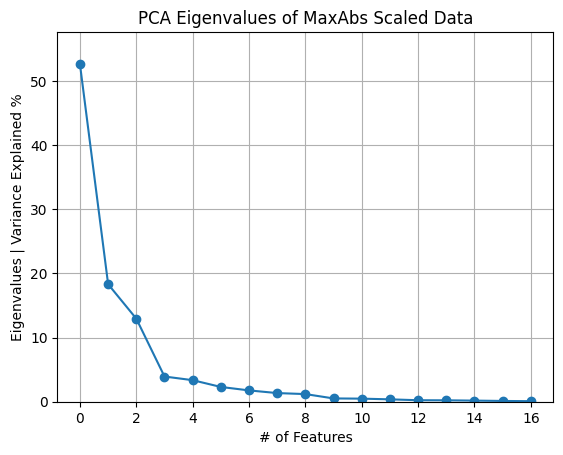

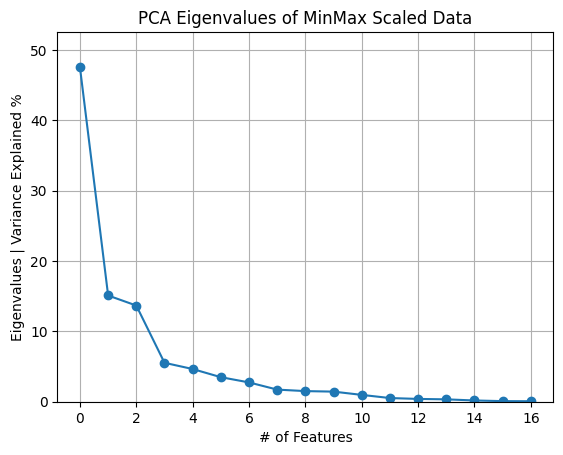

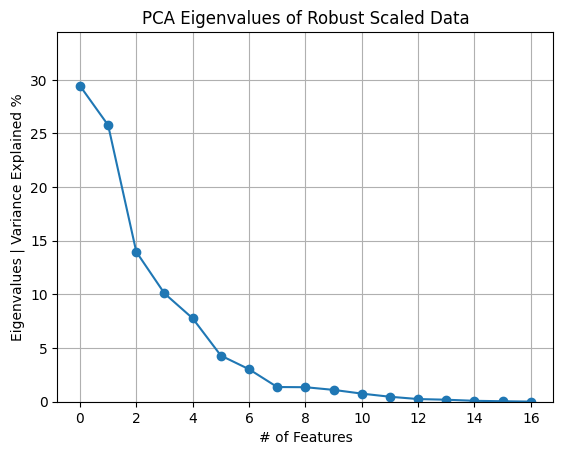

In [18]:
scaled_data = {
    "Z Scaled": df_z_scaled,
    "MaxAbs Scaled": df_maxabs_scaled,
    "MinMax Scaled": df_minmax_scaled,
    "Robust Scaled": df_robust_scaled
}

pca_results = {}
all_pca_data = {}

for name, data in scaled_data.items():
    pca = PCA(n_components=m_features)
    pca.fit(data)
    pca_data = pca.transform(data)
    
    # append to dicts
    all_pca_data[name] = pca_data
    pca_results[name] = pca
    
    screen_plot(pca, name)

In [32]:
# for s_data, pca in pca_results.items():
#     print(f"Results for {s_data}:\n")
#     explained_variance = pca.explained_variance_
#     total_variance = np.sum(explained_variance)

#     for k in range(2, m_features+1):
#         explained = np.sum(explained_variance[:k]) / total_variance
#         print(f"{k} PCs explain {explained:.2%} of the variance")

#     print(f"{"_" * 80}\n")

In [34]:
rows = []

for s_data, pca in pca_results.items():
    explained_variance = pca.explained_variance_
    total_variance = np.sum(explained_variance)

    row_dict = {"Scaling": s_data}

    for k in range(2, m_features + 1):
        explained = np.sum(explained_variance[:k]) / total_variance
        row_dict[f"PC_{k}"] = explained * 100

    rows.append(row_dict)

# Create DataFrame
pivot_df = pd.DataFrame(rows)

# Set scaling as index
pivot_df = pivot_df.set_index("Scaling")

# Round for readability
pivot_df = pivot_df.round(2)

display(pivot_df)


,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17
Scaling,,,,,,,,,,,,,,,,
Z Scaled,54.31,63.80,71.67,77.93,83.62,87.92,91.99,94.31,95.96,97.09,98.09,98.97,99.66,99.87,99.95,100.0
MaxAbs Scaled,70.96,83.91,87.84,91.20,93.51,95.27,96.62,97.81,98.32,98.80,99.17,99.41,99.62,99.80,99.92,100.0
MinMax Scaled,62.67,76.35,81.89,86.54,90.03,92.77,94.49,96.00,97.44,98.41,98.93,99.33,99.67,99.85,99.93,100.0
Robust Scaled,55.22,69.19,79.28,87.05,91.35,94.38,95.75,97.10,98.21,98.96,99.42,99.67,99.86,99.94,99.99,100.0


From the table above, we observe that for **Z-standardized data**, the first **6 principal components** capture approximately **83.62%** of the total variance, meaning that most of the information in the dataset can be represented using only 6 components instead of the original 17 features.

In contrast, for **MaxAbs-scaled data**, around **83%** of the variance is already captured using only **3 principal components**, indicating that the variance is more concentrated in the first few components. After approximately 6–8 principal components, the additional explained variance increases only marginally, suggesting diminishing returns from including more components.

In [20]:
# visualize 3D scatter plot of the first 3 principal components for each scaled dataset
for name, pca_data in all_pca_data.items():
    scatter_plot3D(pca_data, name)

From the 3D Graph that plots the scaled data using 3 PCA's we can see that the customer is sgmented into about 4-6 segments in MinMax and MaxAbs scaled data, while in Robust and Z-standardized data the segmets is densed and no separation between them.

So we can stick to Max Abs scaled data as the first 3PCA's capture more information compared to MinMax Scaled data.

## t-SNE

In [ ]:
# for name, data in scaled_data.items():
#     for perplex in perplexities:
#         data_emb = TSNE(n_components=2, learning_rate='auto',
#                   init='random', perplexity=perplex).fit_transform(data)
    
#         scatter_plot2D(data_emb, title=f"t-SNE Visualization of {name} Data | perplexity = {perplex}")

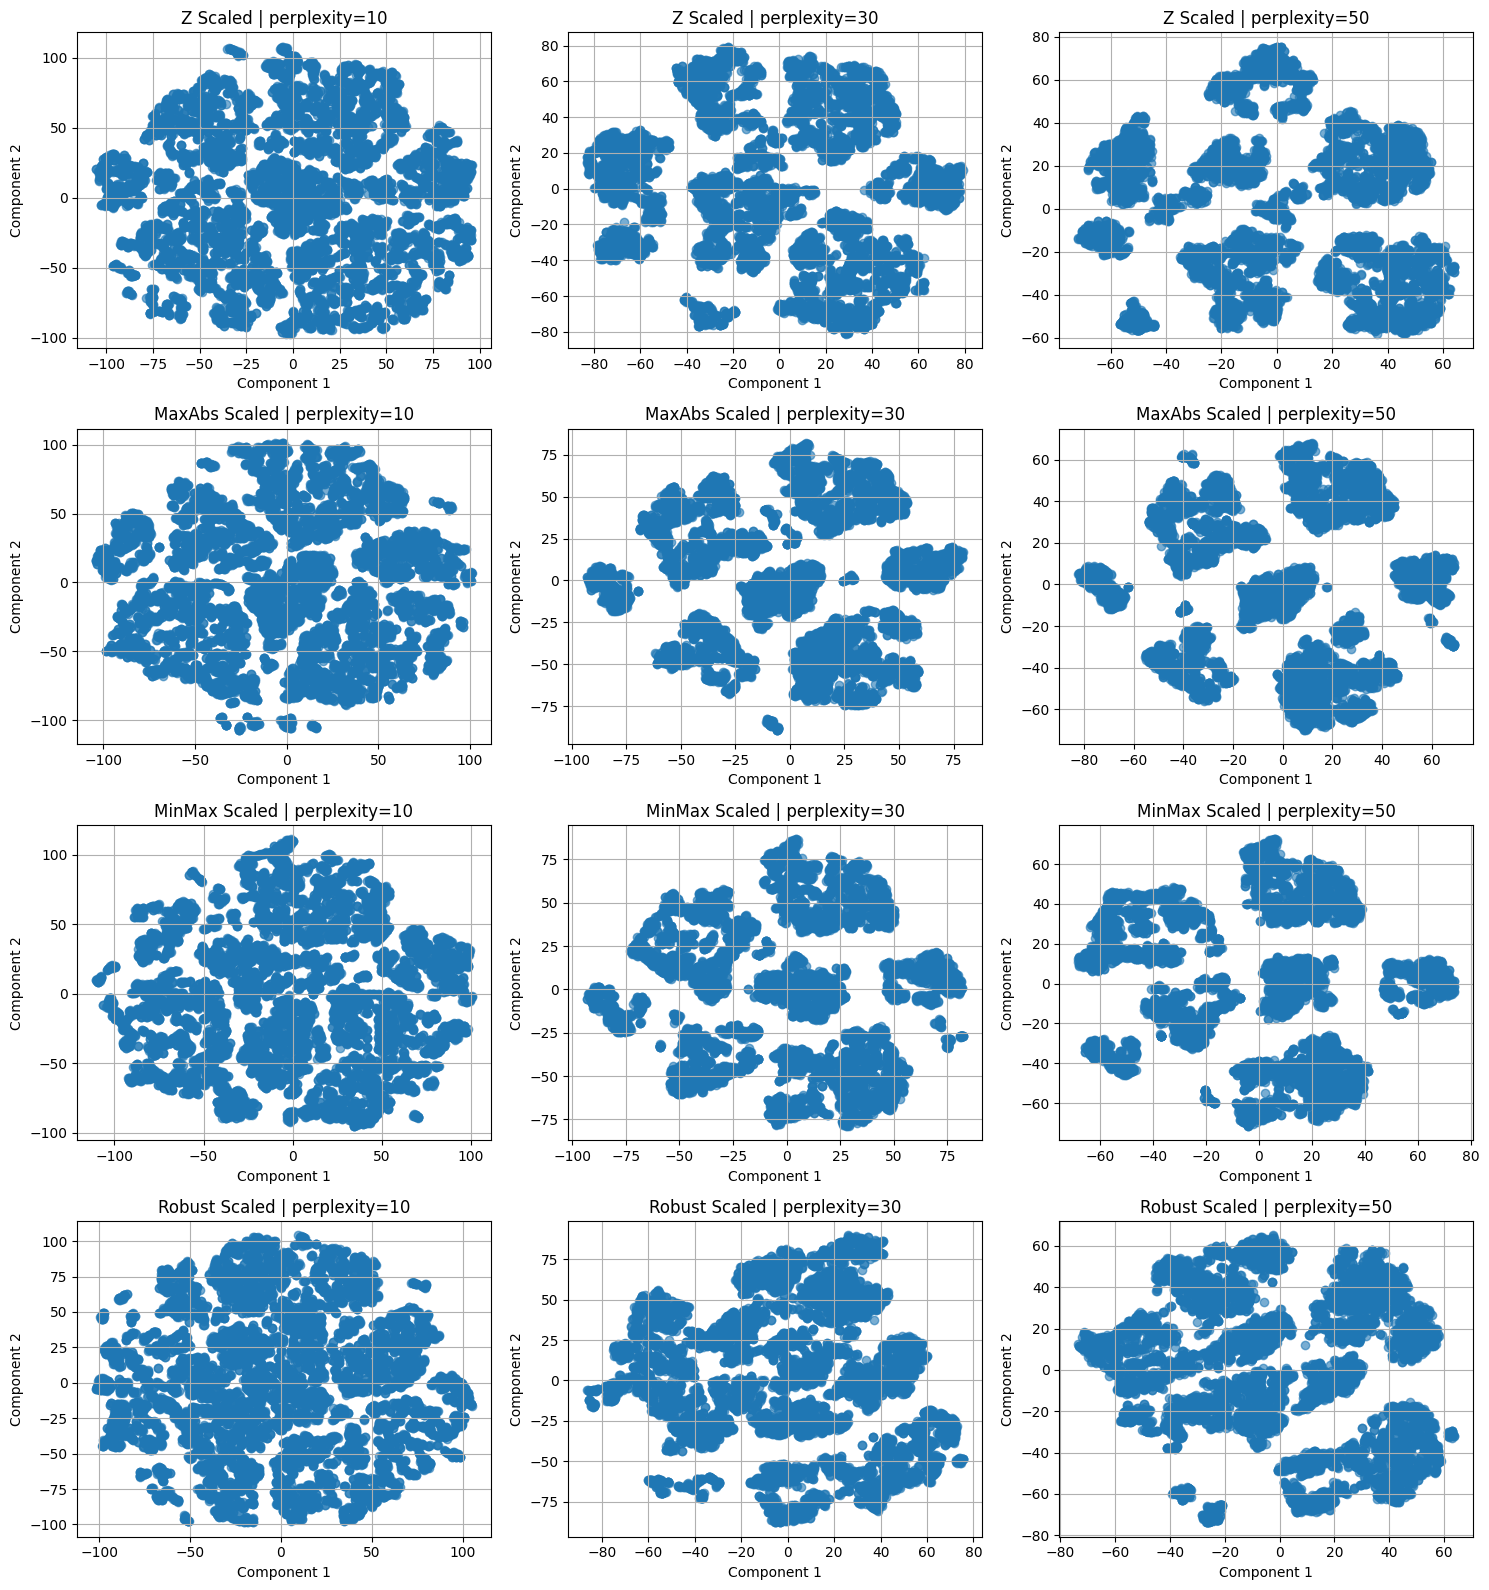

In [28]:
perplexities = [10, 30, 50]

# grid layout (n_sclaed_data, n_perplexities)
n_rows = len(scaled_data)
n_cols = len(perplexities)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

if n_rows == 1:
    axes = [axes]

for row_idx, (name, data) in enumerate(scaled_data.items()):
    for col_idx, perplex in enumerate(perplexities):
        
        tsne = TSNE(
            n_components=2,
            perplexity=perplex,
            learning_rate='auto',
            init='random',
            random_state=42
        )
        
        data_emb = tsne.fit_transform(data)
        
        ax = axes[row_idx][col_idx]
        ax.scatter(data_emb[:, 0], data_emb[:, 1], alpha=0.6)
        ax.set_title(f"{name} | perplexity={perplex}")
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.grid(True)

plt.tight_layout()
plt.show()

# Models

## DBSCAN